# Project Descreption

The Objective of this project is :

1.   Use the OpenFoodFact   that shows  characteristics of certain product groups, similarities between products and product groups, to provide a global view of the dataset, and exhibit salient features that are of interest for an analyst or stakeholder in this sector.

2.   Use some machine learning algorithms to : 

        *   predict the **nutriscore_grade** of a product given nutritional values and possibly other fields (as few as possible)
        *   predict the **nova_group** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **pnns_groups_1** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **pnns_groups_2** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **categories** (either atomic categories or lists of categories) of a product given nutritional values and possibly other fields (as few as possible),
        *   predict one or more **nutritional values** (ex: sugars_100g) given nutritional values and possibly other fields (as few as possible)
        






# Importing the Libraries

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns
from sklearn.preprocessing import  StandardScaler,  LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import statsmodels.api as sm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, plot_roc_curve

# Importing the dataset

In [4]:
data = pd.read_csv('C:/Users/DELL/Desktop/off_complete.csv', sep = '\t', nrows = 10000)

In [5]:
data.shape

(10000, 29)

In [6]:
data.head()

,code,url,product_name,brands,categories,countries_tags,additives_tags,nutriscore_score,nutriscore_grade,nova_group,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000020114,http://world-fr.openfoodfacts.org/produit/0000...,Naturablue original,Natura4Ever,Compléments alimentaires,en:france,en:e422,NaN,NaN,4.0,...,0.0,NaN,0.00,NaN,NaN,NaN,0.08000,NaN,NaN,NaN
1,0000000290616,http://world-fr.openfoodfacts.org/produit/0000...,Salade Cesar,Kirkland Signature,"Aliments et boissons à base de végétaux, Alime...",en:canada,"en:e341,en:e341i,en:e415,en:e517",6.0,c,4.0,...,0.0,2.00,22.00,2.160,0.864,0.000000,0.00000,0.0000,0.00000,6.0
2,0000000394710,http://world-fr.openfoodfacts.org/produit/0000...,Danoises à la cannelle roulées,Kirkland Signature,"Snacks, Snacks sucrés, Biscuits et gâteaux, Pâ...",en:canada,"en:e1100,en:e202,en:e203,en:e330,en:e406,en:e4...",NaN,NaN,4.0,...,28.1,2.05,4.79,0.922,0.369,0.000205,0.00616,0.0548,0.00247,NaN
3,0000000491228,http://world-fr.openfoodfacts.org/produit/0000...,Entremets Crème Brulée,Comme j'aime,"Produits laitiers, Desserts, Produits déshydra...",en:france,"en:e102,en:e110,en:e407,en:e471",2.0,b,4.0,...,69.8,0.10,6.80,0.500,0.200,NaN,NaN,NaN,NaN,2.0
4,0000001938067,http://world-fr.openfoodfacts.org/produit/0000...,Chaussons tressés aux pommes,Kirkland Signature,"Snacks, Snacks sucrés, Biscuits et gâteaux, Vi...",en:canada,"en:e202,en:e211,en:e330",9.0,c,4.0,...,24.7,2.00,3.33,0.647,0.259,0.000000,0.00160,0.0133,0.00048,9.0


# Data Preprocessing

In [7]:
data.drop(['salt_100g'], 1, inplace=True)
data.drop(['nutrition-score-fr_100g'], 1, inplace=True)                         

In [8]:
data.shape

(10000, 27)

In [9]:
data.columns

Index(['code', 'url', 'product_name', 'brands', 'categories', 'countries_tags',
       'additives_tags', 'nutriscore_score', 'nutriscore_grade', 'nova_group',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'energy-kcal_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                10000 non-null  object 
 1   url                 10000 non-null  object 
 2   product_name        10000 non-null  object 
 3   brands              10000 non-null  object 
 4   categories          10000 non-null  object 
 5   countries_tags      9957 non-null   object 
 6   additives_tags      5467 non-null   object 
 7   nutriscore_score    7727 non-null   float64
 8   nutriscore_grade    7727 non-null   object 
 9   nova_group          8997 non-null   float64
 10  pnns_groups_1       9737 non-null   object 
 11  pnns_groups_2       10000 non-null  object 
 12  states              10000 non-null  object 
 13  energy-kcal_100g    6248 non-null   float64
 14  fat_100g            8479 non-null   float64
 15  saturated-fat_100g  8217 non-null   float64
 16  trans

**Note**

While the code of products refers to manufacturer-specific coding with tariff indication, The country or the company markets the product, The manufacturer, the Article code and a control key, so we can drop the  product code , because we already have the country that markets the product.

In [11]:
data.drop(['code'], 1, inplace=True)

In [12]:
data['url'].values

array(['http://world-fr.openfoodfacts.org/produit/0000000020114/naturablue-original-natura4ever',
       'http://world-fr.openfoodfacts.org/produit/0000000290616/salade-cesar-kirkland-signature',
       'http://world-fr.openfoodfacts.org/produit/0000000394710/danoises-a-la-cannelle-roulees-kirkland-signature',
       ...,
       'http://world-fr.openfoodfacts.org/produit/20426255/baguette-cereales-a-finir-de-cuire-maitre-jean-pierre',
       'http://world-fr.openfoodfacts.org/produit/20426262/baguette-a-finir-de-cuire-maitre-jean-pierre',
       'http://world-fr.openfoodfacts.org/produit/20426279/4-petits-pains-a-finir-de-cuire-maitre-jean-pierre'],
      dtype=object)

**Note :**

We see that in every url of the products, it contains the product name and the brand, so we can drop this feature

In [13]:
data.drop(['url'], 1, inplace=True)

I will Try to find the pourcentage of the null values in every features, and drop the features with more than 70% of null values.

In [14]:
for i in data.columns:
    h = (data[i].isnull().sum()/len(data['product_name']))*100
    print('The pourcentage of the null values of '+i+' is : ', h, '%')


The pourcentage of the null values of product_name is :  0.0 %
The pourcentage of the null values of brands is :  0.0 %
The pourcentage of the null values of categories is :  0.0 %
The pourcentage of the null values of countries_tags is :  0.43 %
The pourcentage of the null values of additives_tags is :  45.33 %
The pourcentage of the null values of nutriscore_score is :  22.73 %
The pourcentage of the null values of nutriscore_grade is :  22.73 %
The pourcentage of the null values of nova_group is :  10.03 %
The pourcentage of the null values of pnns_groups_1 is :  2.63 %
The pourcentage of the null values of pnns_groups_2 is :  0.0 %
The pourcentage of the null values of states is :  0.0 %
The pourcentage of the null values of energy-kcal_100g is :  37.519999999999996 %
The pourcentage of the null values of fat_100g is :  15.21 %
The pourcentage of the null values of saturated-fat_100g is :  17.83 %
The pourcentage of the null values of trans-fat_100g is :  85.72999999999999 %
The po

In [15]:
data.drop(['trans-fat_100g'], 1, inplace=True)
data.drop(['cholesterol_100g'], 1, inplace=True)
data.drop(['vitamin-a_100g'], 1, inplace=True)
data.drop(['vitamin-c_100g'], 1, inplace=True)
data.drop(['calcium_100g'], 1, inplace=True)
data.drop(['iron_100g'], 1, inplace=True)

I will Pick up the countries_tags with highest number of products 


In [16]:
data['countries_tags'].value_counts().head(17)

en:france                      3287
en:united-states               1232
en:germany                      629
en:canada                       577
en:united-kingdom               558
en:mexico                       490
en:france,en:united-kingdom     357
en:spain                        354
en:france,en:germany            274
en:france,en:united-states      255
en:canada,en:france             121
en:belgium,en:france             94
en:france,en:spain               76
en:belgium                       71
en:france,en:switzerland         55
en:poland                        51
en:austria,en:germany            48
Name: countries_tags, dtype: int64

In [17]:
data['countries_tags']=data['countries_tags'].fillna('Unknown')

In [18]:
countries_tags_values = data['countries_tags'].values
most_countries = ('en:france' , 'en:germany',  'en:spain' , 'en:mexico', 'en:united-kingdom' ,'en:canada', 'en:united-states', 'en:belgium','en:switzerland',  'en:poland')
countrie= {'en:france' : [], 'en:germany': [],  'en:spain': [] , 'en:mexico': [], 'en:united-kingdom': [], 'en:canada': [], 'en:united-states': [], 'en:belgium': [],
           'en:switzerland': [],'en:poland': []} 
for i in countries_tags_values : 
   for j in most_countries:
       if j in str(i):
         countrie[j].append(1)
       else : 
          countrie[j].append(0)


In [19]:
for i in most_countries:
  data[i] = pd.DataFrame(countrie[i])

In [20]:
data.drop(['countries_tags'], 1, inplace=True)

I will work on the Product Name Feature

In [21]:
product_names_list = data['product_name'].values
list_products = []
for i in product_names_list:
  i = i.replace('Le', '')
  i = i.replace('La', '')
  i = i.replace('2', '')
  first_word = i.split()[0]
  list_products.append(first_word)
data['product_name'] = pd.DataFrame(list_products)

In [22]:
data['product_name'].value_counts().head(10)

Organic      102
Pain          72
Chocolate     62
Sauce         55
Salade        51
Crème         43
Original      42
Jambon        42
Jus           41
Bio           41
Name: product_name, dtype: int64

In [23]:
product_name__values = data['product_name'].values
most_products = ('Organic' , 'Pain',  'Chocolate' , 'Filet', 'Sauce' ,'Salade', 'Crème', 'Jambon','Original', 'Bio', 'Jus')
products= {'Organic':[] , 'Pain':[],  'Chocolate':[] , 'Filet':[], 'Sauce':[] ,'Salade':[], 'Crème':[], 'Jambon':[],'Original':[], 'Bio':[], 'Jus':[]} 
for i in product_name__values : 
   for j in most_products:
       if j in str(i):
         products[j].append(1)
       else : 
          products[j].append(0)
for i in most_products:
  data[i] = pd.DataFrame(products[i])
data.drop(['product_name'], 1, inplace=True)

In [24]:
data.drop(['brands'], 1, inplace=True)

In [25]:
categories_list = data['categories'].values
list_categories = []
for i in categories_list:
  first_word = i.split()[0]
  first_word = first_word.replace(',', '')
  list_categories.append(first_word)
data['categories'] = pd.DataFrame(list_categories)


In [26]:
data['categories'].value_counts().head(11)

Snacks         1284
Aliments       1282
Plant-based    1023
Produits        535
Alimentos       500
Viandes         472
Boissons        329
Pflanzliche     299
Plats           256
Groceries       234
Dairies         212
Name: categories, dtype: int64

In [27]:
categories__values = data['categories'].values
most_categories = ('Snacks' , 'Aliments',  'Plant-based' , 'Produits', 'Alimentos' ,'Viandes', 'Boissons', 'Pflanzliche','Plats', 'Groceries', 'Dairies')
categories= {'Snacks':[] , 'Aliments':[],  'Plant-based':[] , 'Produits':[], 'Alimentos':[] ,'Viandes':[], 'Boissons':[], 'Pflanzliche':[],'Plats':[], 'Groceries':[], 'Dairies':[]} 
for i in categories__values : 
   for j in most_categories:
       if j in str(i):
         categories[j].append(1)
       else : 
          categories[j].append(0)
for i in most_categories:
  data[i] = pd.DataFrame(categories[i])
data.drop(['categories'], 1, inplace=True)
data['Aliments'] = data['Aliments']+ data['Alimentos']
aliments_values = data['Aliments'].values
for i in range(len(aliments_values)):
  if aliments_values[i]==2:
        aliments_values[i] = 1
data['Aliments'] = pd.DataFrame(aliments_values)
data.drop(['Alimentos'], 1, inplace=True)

In [28]:
data.drop(['additives_tags','states'], 1, inplace=True)

In [29]:
data['nutriscore_grade'].fillna('None', inplace = True)

In [30]:
def function_escalier(x):
  if x >=0:
      return(int(x+0.5))
  else:
    return int(x)

In [31]:
data['nutriscore_score'] = data['nutriscore_score'].astype(float)
data_grouped = data.groupby('pnns_groups_2')['nutriscore_score'].mean()
grades = list(data['pnns_groups_2'].unique())
for grade in grades:
  p = data['pnns_groups_2'] == grade
  data.loc[p, 'nutriscore_score'] = data.loc[p, 'nutriscore_score'].fillna(function_escalier(data_grouped[grade]))

In [32]:
df =pd.get_dummies(data['nova_group'])
for i in df.columns[:-1] : 
         data['nova_group'+str(i)] = df[i]
data.drop(['nova_group'], 1, inplace=True)

In [33]:
dh = data.groupby(['pnns_groups_1'])['pnns_groups_2'].value_counts()

In [34]:
dh = list(dict(dh))
dh

[('Beverages', 'Sweetened beverages'),
 ('Beverages', 'Fruit juices'),
 ('Beverages', 'Artificially sweetened beverages'),
 ('Beverages', 'Plant-based milk substitutes'),
 ('Beverages', 'Waters and flavored waters'),
 ('Beverages', 'Unsweetened beverages'),
 ('Beverages', 'Fruit nectars'),
 ('Beverages', 'Teas and herbal teas and coffees'),
 ('Cereals and potatoes', 'Cereals'),
 ('Cereals and potatoes', 'Bread'),
 ('Cereals and potatoes', 'Breakfast cereals'),
 ('Cereals and potatoes', 'Legumes'),
 ('Cereals and potatoes', 'Potatoes'),
 ('Composite foods', 'One-dish meals'),
 ('Composite foods', 'Sandwiches'),
 ('Composite foods', 'Pizza pies and quiche'),
 ('Fat and sauces', 'Dressings and sauces'),
 ('Fat and sauces', 'Fats'),
 ('Fish Meat Eggs', 'Meat'),
 ('Fish Meat Eggs', 'Processed meat'),
 ('Fish Meat Eggs', 'Fish and seafood'),
 ('Fish Meat Eggs', 'Eggs'),
 ('Fish Meat Eggs', 'Offals'),
 ('Fruits and vegetables', 'Vegetables'),
 ('Fruits and vegetables', 'Fruits'),
 ('Fruits an

In [35]:
data['pnns_groups_1'].fillna('To Replace', inplace = True)
d = data[data['pnns_groups_1'] =='To Replace']['pnns_groups_2']
d.unique()

array(['Alcoholic beverages', 'Pizza pies and quiches'], dtype=object)

In [36]:
new_data = data[['pnns_groups_1','pnns_groups_2']].values
a_list1 = []
a_list2 = []
for i in range(len(new_data)):
     if new_data[i][1]=='Alcoholic beverages':
        new_data[i][0] ='Beverages'
     if new_data[i][1]=='Pizza pies and quiches':
        new_data[i][0] ='Composite foods'
df= pd.DataFrame(new_data, columns = ['pnns_groups_1','pnns_groups_2'])
data['pnns_groups_1'] = df['pnns_groups_1'] 
data['pnns_groups_2'] = df['pnns_groups_2'] 

In [37]:
lists= ['energy-kcal_100g','fat_100g', 'saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','sodium_100g']
for feature in lists:
    data[feature] = data[feature].astype(float)
    data_grouped = data.groupby('pnns_groups_2')[feature].mean()
    list_feature = list(data['pnns_groups_2'].unique())
    for value_f in list_feature:
         p = data['pnns_groups_2'] == value_f
         data.loc[p, feature] = data.loc[p, feature].fillna(data_grouped[value_f])

In [38]:
data['fat_100g'] = data['fat_100g'].astype(float)
data_grouped = data.groupby('pnns_groups_2')['fat_100g'].mean()
grades = list(data['pnns_groups_2'].unique())
for grade in grades:
  p = data['pnns_groups_2'] == grade
  data.loc[p, 'fat_100g'] = data.loc[p, 'fat_100g'].fillna(function_escalier(data_grouped[grade]))

In [39]:
df =pd.get_dummies(data['nutriscore_grade'], drop_first=True)
for i in df.columns : 
         data['nutriscore_grade_'+i] = df[i]

In [40]:
data.head()

,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,Groceries,Dairies,nova_group1.0,nova_group2.0,nova_group3.0,nutriscore_grade_a,nutriscore_grade_b,nutriscore_grade_c,nutriscore_grade_d,nutriscore_grade_e
0,9.0,None,unknown,unknown,0.000000,0.0,0.000000,0.0,0.0,3.642324,...,0,0,0,0,0,0,0,0,0,0
1,6.0,c,Fruits and vegetables,Vegetables,290.000000,12.0,7.000000,23.0,0.0,2.000000,...,0,0,0,0,0,0,0,1,0,0
2,18.0,None,Sugary snacks,Biscuits and cakes,363.000000,14.4,9.155663,54.1,28.1,2.050000,...,0,0,0,0,0,0,0,0,0,0
3,2.0,b,Milk and dairy products,Dairy desserts,169.272414,15.3,11.200000,75.5,69.8,0.100000,...,0,0,0,0,0,0,1,0,0,0
4,9.0,c,sugary-snacks,pastries,260.000000,10.7,2.000000,38.7,24.7,2.000000,...,0,0,0,0,0,0,0,1,0,0


In [41]:
data.isnull().sum()

nutriscore_score      0
nutriscore_grade      0
pnns_groups_1         0
pnns_groups_2         0
energy-kcal_100g      0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
sodium_100g           0
en:france             0
en:germany            0
en:spain              0
en:mexico             0
en:united-kingdom     0
en:canada             0
en:united-states      0
en:belgium            0
en:switzerland        0
en:poland             0
Organic               0
Pain                  0
Chocolate             0
Filet                 0
Sauce                 0
Salade                0
Crème                 0
Jambon                0
Original              0
Bio                   0
Jus                   0
Snacks                0
Aliments              0
Plant-based           0
Produits              0
Viandes               0
Boissons              0
Pflanzliche           0
Plats                 0
Groceries       

In [42]:
data['pnns_groups_1'].unique()

array(['unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Milk and dairy products', 'sugary-snacks', 'Beverages',
       'Composite foods', 'Fat and sauces', 'Cereals and potatoes',
       'Fish Meat Eggs', 'Salty snacks', 'fruits-and-vegetables',
       'cereals-and-potatoes'], dtype=object)

In [43]:
df =pd.get_dummies(data[['pnns_groups_1']], drop_first=True)
for i in df.columns : 
         data[i] = df[i]
data.drop(['pnns_groups_1'], 1, inplace=True)

In [44]:
data['nutriscore_score'] = data['nutriscore_score'].astype(int)


In [45]:
data.drop(['nutriscore_grade'], 1, inplace=True)

In [46]:
data.head(15)

,nutriscore_score,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,...,pnns_groups_1_Fat and sauces,pnns_groups_1_Fish Meat Eggs,pnns_groups_1_Fruits and vegetables,pnns_groups_1_Milk and dairy products,pnns_groups_1_Salty snacks,pnns_groups_1_Sugary snacks,pnns_groups_1_cereals-and-potatoes,pnns_groups_1_fruits-and-vegetables,pnns_groups_1_sugary-snacks,pnns_groups_1_unknown
0,9,unknown,0.000000,0.000000,0.000000,0.000000,0.000000,3.642324,0.000000,2.077011,...,0,0,0,0,0,0,0,0,0,1
1,6,Vegetables,290.000000,12.000000,7.000000,23.000000,0.000000,2.000000,22.000000,0.864000,...,0,0,1,0,0,0,0,0,0,0
2,18,Biscuits and cakes,363.000000,14.400000,9.155663,54.100000,28.100000,2.050000,4.790000,0.369000,...,0,0,0,0,0,1,0,0,0,0
3,2,Dairy desserts,169.272414,15.300000,11.200000,75.500000,69.800000,0.100000,6.800000,0.200000,...,0,0,0,1,0,0,0,0,0,0
4,9,pastries,260.000000,10.700000,2.000000,38.700000,24.700000,2.000000,3.330000,0.259000,...,0,0,0,0,0,0,0,0,1,0
5,2,unknown,278.000000,1.110000,0.333000,53.300000,1.110000,2.220000,10.000000,0.610000,...,0,0,0,0,0,0,0,0,0,1
6,12,Sweetened beverages,51.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.400000,...,0,0,0,0,0,0,0,0,0,0
7,18,Biscuits and cakes,433.310800,19.446346,9.155663,57.331311,28.653719,3.344314,6.710910,0.752540,...,0,0,0,0,0,1,0,0,0,0
8,2,Pizza pies and quiche,114.000000,6.790000,2.860000,7.860000,0.714000,0.357000,5.360000,0.200000,...,0,0,0,0,0,0,0,0,0,0
9,1,Fruits,377.000000,0.500000,0.100000,93.000000,66.000000,1.575918,1.500000,0.008000,...,0,0,1,0,0,0,0,0,0,0


In [47]:
features = data
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

,skew
sodium_100g,69.929272
Jambon,15.151319
Crème,15.151319
Jus,14.975886
Original,14.806308
Salade,13.895451
Sauce,13.131806
Chocolate,12.379679
Filet,12.186952
Bio,11.495329


**Some Statistics : Skewness**

**Handling The  Outliers**

In [48]:
le = LabelEncoder()
data['pnns_groups_2'] = le.fit_transform(data['pnns_groups_2'])

In [49]:
data.head()

,nutriscore_score,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,...,pnns_groups_1_Fat and sauces,pnns_groups_1_Fish Meat Eggs,pnns_groups_1_Fruits and vegetables,pnns_groups_1_Milk and dairy products,pnns_groups_1_Salty snacks,pnns_groups_1_Sugary snacks,pnns_groups_1_cereals-and-potatoes,pnns_groups_1_fruits-and-vegetables,pnns_groups_1_sugary-snacks,pnns_groups_1_unknown
0,9,42,0.000000,0.0,0.000000,0.0,0.0,3.642324,0.00,2.077011,...,0,0,0,0,0,0,0,0,0,1
1,6,37,290.000000,12.0,7.000000,23.0,0.0,2.000000,22.00,0.864000,...,0,0,1,0,0,0,0,0,0,0
2,18,3,363.000000,14.4,9.155663,54.1,28.1,2.050000,4.79,0.369000,...,0,0,0,0,0,1,0,0,0,0
3,2,9,169.272414,15.3,11.200000,75.5,69.8,0.100000,6.80,0.200000,...,0,0,0,1,0,0,0,0,0,0
4,9,41,260.000000,10.7,2.000000,38.7,24.7,2.000000,3.33,0.259000,...,0,0,0,0,0,0,0,0,1,0


In [50]:
tr = data
for y in tr.columns :
  factor = 4
  upper_lim = data[y].mean () + data[y].std () * factor
  lower_lim = data[y].mean () - data[y].std () * factor
  data = data[(data[y] < upper_lim) & (data[y] > lower_lim)]

In [51]:
data.shape

(5196, 61)


# Prediction of the nova_group

In [52]:
y = data['pnns_groups_2']
X = data.drop(['pnns_groups_2'], 1)

In [53]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 >99.94:
        overfit.append(i)

In [54]:
overfit = list(overfit)
overfit

['en:mexico',
 'en:belgium',
 'en:switzerland',
 'en:poland',
 'Organic',
 'Pain',
 'Chocolate',
 'Filet',
 'Sauce',
 'Salade',
 'Crème',
 'Jambon',
 'Original',
 'Bio',
 'Jus',
 'Produits',
 'Viandes',
 'Boissons',
 'Pflanzliche',
 'Plats',
 'Groceries',
 'Dairies',
 'nova_group2.0',
 'pnns_groups_1_Fat and sauces',
 'pnns_groups_1_Milk and dairy products',
 'pnns_groups_1_cereals-and-potatoes',
 'pnns_groups_1_fruits-and-vegetables',
 'pnns_groups_1_sugary-snacks']

Let's drop these overfits from 'X' .  

In [55]:
X.drop(overfit,axis=1,inplace=True)

Spliting the datasets into the training set and the test set

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2)

Scaling the dataset

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In this step, we will use three algorithms:
  - Two linear algorithms (Logistic Regression & Support Vector Classifier)
  - The $K$-Nearest Neighbors Classifier Algorithm
  - Two Ensemble learning  algorithms (Random Forest Classifier, Decision Tree Classifier)
  - Two Gradient Boosting algorithms (LighGBM, XGBoost)

In [58]:
train_accuracies = {'Logistic Regression':0, 'Support Vector Classifier':0, 'K-Neighbors Classifier':0, 'Random Forest Classifier':0, 'Decision Tree Classifier' : 0, 
                    'XGBoost Classifier' : 0,'lightgbm Classifier' : 0}
test_accuracies = {'Logistic Regression':0, 'Support Vector Classifier':0, 'K-Neighbors Classifier':0, 'Random Forest Classifier':0, 'Decision Tree Classifier' : 0, 
                    'XGBoost Classifier' : 0,'lightgbm Classifier' : 0}

In [59]:
lgr = LogisticRegression()
lgr.fit(X_train , y_train)
train_preds = lgr.predict(X_train)
test_preds = lgr.predict(X_test)
scores1 = cross_val_score(lgr, train_preds.reshape(-1, 1), y_train.ravel(), scoring= 'accuracy', cv=10)
scores2 = cross_val_score(lgr, test_preds.reshape(-1, 1), y_test.ravel(), scoring= 'accuracy', cv=10)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [60]:
print("Logistic Regression results :")
print("   -   Accuracy on the train set : {:.2f}%".format(scores1.mean()*100))
train_accuracies['Logistic Regression'] = scores1.mean()*100
print("   -   Accuracy on the test set : {:.2f}%".format(scores2.mean()*100))
test_accuracies['Logistic Regression'] = scores2.mean()*100

Logistic Regression results :
   -   Accuracy on the train set : 34.48%
   -   Accuracy on the test set : 33.17%


In [61]:
svc = SVC()
svc.fit(X_train , y_train)
train_preds = svc.predict(X_train)
test_preds = svc.predict(X_test)
scores1 = cross_val_score(svc, train_preds.reshape(-1, 1), y_train.ravel(), scoring= 'accuracy', cv=10)
scores2 = cross_val_score(svc, test_preds.reshape(-1, 1), y_test.ravel(), scoring= 'accuracy', cv=10)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [62]:
print("Support Vector Classifier results :")
print("   -   Accuracy on the train set : {:.2f}%".format(scores1.mean()*100))
train_accuracies['Support Vector Classifier'] = scores1.mean()*100
print("   -   Accuracy on the test set : {:.2f}%".format(scores2.mean()*100))
test_accuracies['Support Vector Classifier'] = scores2.mean()*100

Support Vector Classifier results :
   -   Accuracy on the train set : 71.37%
   -   Accuracy on the test set : 60.96%


In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
train_preds = knn.predict(X_train)
test_preds = knn.predict(X_test)
scores1 = cross_val_score(knn, train_preds.reshape(-1, 1), y_train.ravel(), scoring= 'accuracy', cv=10)
scores2 = cross_val_score(knn, test_preds.reshape(-1, 1), y_test.ravel(), scoring= 'accuracy', cv=10)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [64]:
print("K-Neighbors Classifier results :")
print("   -   Accuracy on the train set : {:.2f}%".format(scores1.mean()*100))
train_accuracies['K-Neighbors Classifier'] = scores1.mean()*100
print("   -   Accuracy on the test set : {:.2f}%".format(scores2.mean()*100))
test_accuracies['K-Neighbors Classifier'] = scores2.mean()*100

K-Neighbors Classifier results :
   -   Accuracy on the train set : 83.64%
   -   Accuracy on the test set : 78.08%


In [65]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
train_preds = dt.predict(X_train)
test_preds = dt.predict(X_test)
scores1 = cross_val_score(dt, train_preds.reshape(-1, 1), y_train.ravel(), scoring= 'accuracy', cv=10)
scores2 = cross_val_score(dt, test_preds.reshape(-1, 1), y_test.ravel(), scoring= 'accuracy', cv=10)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [66]:
print("Decision Tree Classifier results :")
print("   -   Accuracy on the train set : {:.2f}%".format(scores1.mean()*100))
train_accuracies['Decision Tree Classifier'] = scores1.mean()*100
print("   -   Accuracy on the test set : {:.2f}%".format(scores2.mean()*100))
test_accuracies['Decision Tree Classifier'] = scores2.mean()*100

Decision Tree Classifier results :
   -   Accuracy on the train set : 99.98%
   -   Accuracy on the test set : 87.40%


In [67]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)
scores1 = cross_val_score(rf, train_preds.reshape(-1, 1), y_train.ravel(), scoring= 'accuracy', cv=10)
scores2 = cross_val_score(rf, test_preds.reshape(-1, 1), y_test.ravel(), scoring= 'accuracy', cv=10)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [68]:
print("Random Forest Classifier results :")
print("   -   Accuracy on the train set : {:.2f}%".format(scores1.mean()*100))
train_accuracies['Random Forest Classifier'] = scores1.mean()*100
print("   -   Accuracy on the test set : {:.2f}%".format(scores2.mean()*100))
test_accuracies['Random Forest Classifier'] = scores2.mean()*100

Random Forest Classifier results :
   -   Accuracy on the train set : 99.98%
   -   Accuracy on the test set : 92.02%


In [69]:
gb = XGBClassifier()
gb.fit(X_train , y_train)
train_preds = gb.predict(X_train)
test_preds = gb.predict(X_test)
scores1 = cross_val_score(gb, X = train_preds.reshape(-1, 1), y = y_train.ravel(), scoring= 'accuracy', cv=10)
scores2 = cross_val_score(gb, X =  test_preds.reshape(-1, 1), y = y_test.ravel(), scoring= 'accuracy', cv=10)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [70]:
print("XGBoost Classifier results :")
print("   -   Accuracy on the train set : {:.2f}%".format(scores1.mean()*100))
train_accuracies['XGBoost Classifier'] = scores1.mean()*100
print("   -   Accuracy on the test set : {:.2f}%".format(scores2.mean()*100))
test_accuracies['XGBoost Classifier'] = scores2.mean()*100

XGBoost Classifier results :
   -   Accuracy on the train set : 99.98%
   -   Accuracy on the test set : 92.50%


In [71]:
gbm = lgb.LGBMClassifier()
gbm.fit(X_train , y_train)
train_preds = gbm.predict(X_train)
test_preds = gbm.predict(X_test)
scores1 = cross_val_score(gb, X = train_preds.reshape(-1, 1), y = y_train.ravel(), scoring= 'accuracy', cv=10)
scores2 = cross_val_score(gb, X =  test_preds.reshape(-1, 1), y = y_test.ravel(), scoring= 'accuracy', cv=10)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [72]:
print("XGBoost Classifier results :")
print("   -   Accuracy on the train set : {:.2f}%".format(scores1.mean()*100))
train_accuracies['lightgbm Classifier'] = scores1.mean()*100
print("   -   Accuracy on the test set : {:.2f}%".format(scores2.mean()*100))
test_accuracies['lightgbm Classifier'] = scores2.mean()*100

XGBoost Classifier results :
   -   Accuracy on the train set : 27.94%
   -   Accuracy on the test set : 26.83%


In [73]:
train_accuracies

{'Logistic Regression': 34.48036376274328,
 'Support Vector Classifier': 71.36700648748841,
 'K-Neighbors Classifier': 83.63982854494904,
 'Random Forest Classifier': 99.97596153846153,
 'Decision Tree Classifier': 99.97596153846153,
 'XGBoost Classifier': 99.97596153846153,
 'lightgbm Classifier': 27.935298887859126}

In [74]:
test_accuracies

{'Logistic Regression': 33.17307692307693,
 'Support Vector Classifier': 60.96153846153845,
 'K-Neighbors Classifier': 78.07692307692308,
 'Random Forest Classifier': 92.01923076923079,
 'Decision Tree Classifier': 87.40384615384616,
 'XGBoost Classifier': 92.5,
 'lightgbm Classifier': 26.82692307692308}

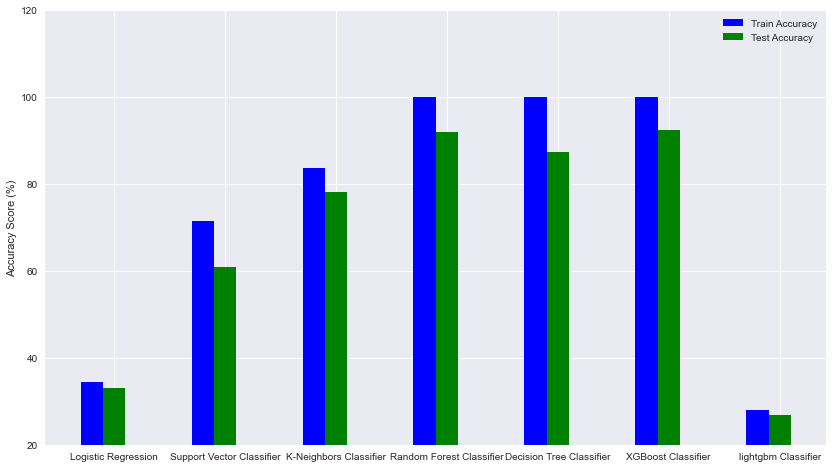

In [75]:
ind = np.arange(7)
width = 0.2

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, list(train_accuracies.values()), width, color='b')
rects2 = ax.bar(ind+width, list(test_accuracies.values()), width, color='g')

ax.set_ylabel('Accuracy Score (%)')
ax.set_xticks(ind+width)
ax.set_xticklabels(list(test_accuracies.keys()) )
ax.legend((rects1[0], rects2[0]), ('Train Accuracy', 'Test Accuracy'))

plt.ylim((20,120))
plt.show()


As we have seen from the data visualization, the **Ensemble Modeling algorithms and Boosting algorithms**  are the most efficient although the data are far from being linearly separable. Moreover, **XGBoost** seems to be the most promising model in our case since it is the one that overfits less the data.

In [76]:
y_pred = gb.predict(X_test)

In [77]:
output = pd.DataFrame({'Nutriscore_grade_Prediction': y_pred})

filename = 'Predictions.csv'

output.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Predictions.csv
